# 1.3.1 Задание
Задайте 4 точки в трехмерном пространстве, рассчитайте между ними расстояния по описанным в примере выше метрикам. Отобразите точки в трехмерном пространстве.

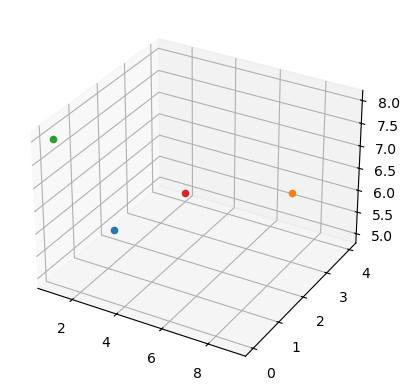

Расстояние:	Евклидово	Кв. Евклидова	Чебышева	Хемминга
AB		8.246		68.000		8.000		10.000
AC		3.606		13.000		3.000		5.000
AD		2.236		5.000		2.000		3.000
BC		8.307		69.000		8.000		11.000
BD		7.550		57.000		7.000		11.000
CD		5.099		26.000		4.000		8.000


In [66]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as lg
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations

class Coords:
    def __init__(self,name, x, y, z):
        self.name = name
        self.x = x
        self.y = y
        self.z = z
    def get(self):
        return np.array((self.x,self.y,self.z))

def euclid(a,b):
    return lg.norm(a.get()-b.get())
def euclid_sq(a,b):
    return euclid(a,b)**2
def chebyshev(a,b):
    return lg.norm(a.get()-b.get(),ord=np.inf)
def hemming(a,b):
    return lg.norm(a.get()-b.get(),ord=1)

    
ax = plt.figure().add_subplot(111,projection="3d")
A = Coords("A", 1,2,5)
B = Coords("B", 9,2,7)
C = Coords("C", 1,0,8)
D = Coords("D", 2,4,5)
t=[A,B,C,D]
[ax.scatter(i.x,i.y,i.z) for i in t]
plt.show()


combs = list(combinations(t,2))

print("Расстояние:\tЕвклидово\tКв. Евклидова\tЧебышева\tХемминга")
for comb in combs:
    print("{:s}{:s}\t\t{:.3f}\t\t{:.3f}\t\t{:.3f}\t\t{:.3f}".format(
    comb[0].name,comb[1].name,euclid(comb[0],comb[1]),euclid_sq(comb[0],comb[1])
    ,chebyshev(comb[0],comb[1]),hemming(comb[0],comb[1])))

# 1.3.2 Задание
Создать 5x5 матрицу со значениями в строках от 0 до 4 Для создания
необходимо использовать функцию arrange.

In [64]:
Z = np.zeros((5,5))
Z += np.arange(5)  
print(Z)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


# 2.3.1 Задание
Для предыдущего примера классификатора:
1. Установите другое количество ближайших соседей (k = 1, 5, 10).
2. Установите размер тестовой выборки 15% от всего датасета.
3. Постройте графики и оцените качество моделей, проанализируйте результаты.

Для 1 ближайших соседей, точность составила: 0.913
Для 5 ближайших соседей, точность составила: 0.957
Для 10 ближайших соседей, точность составила: 0.913


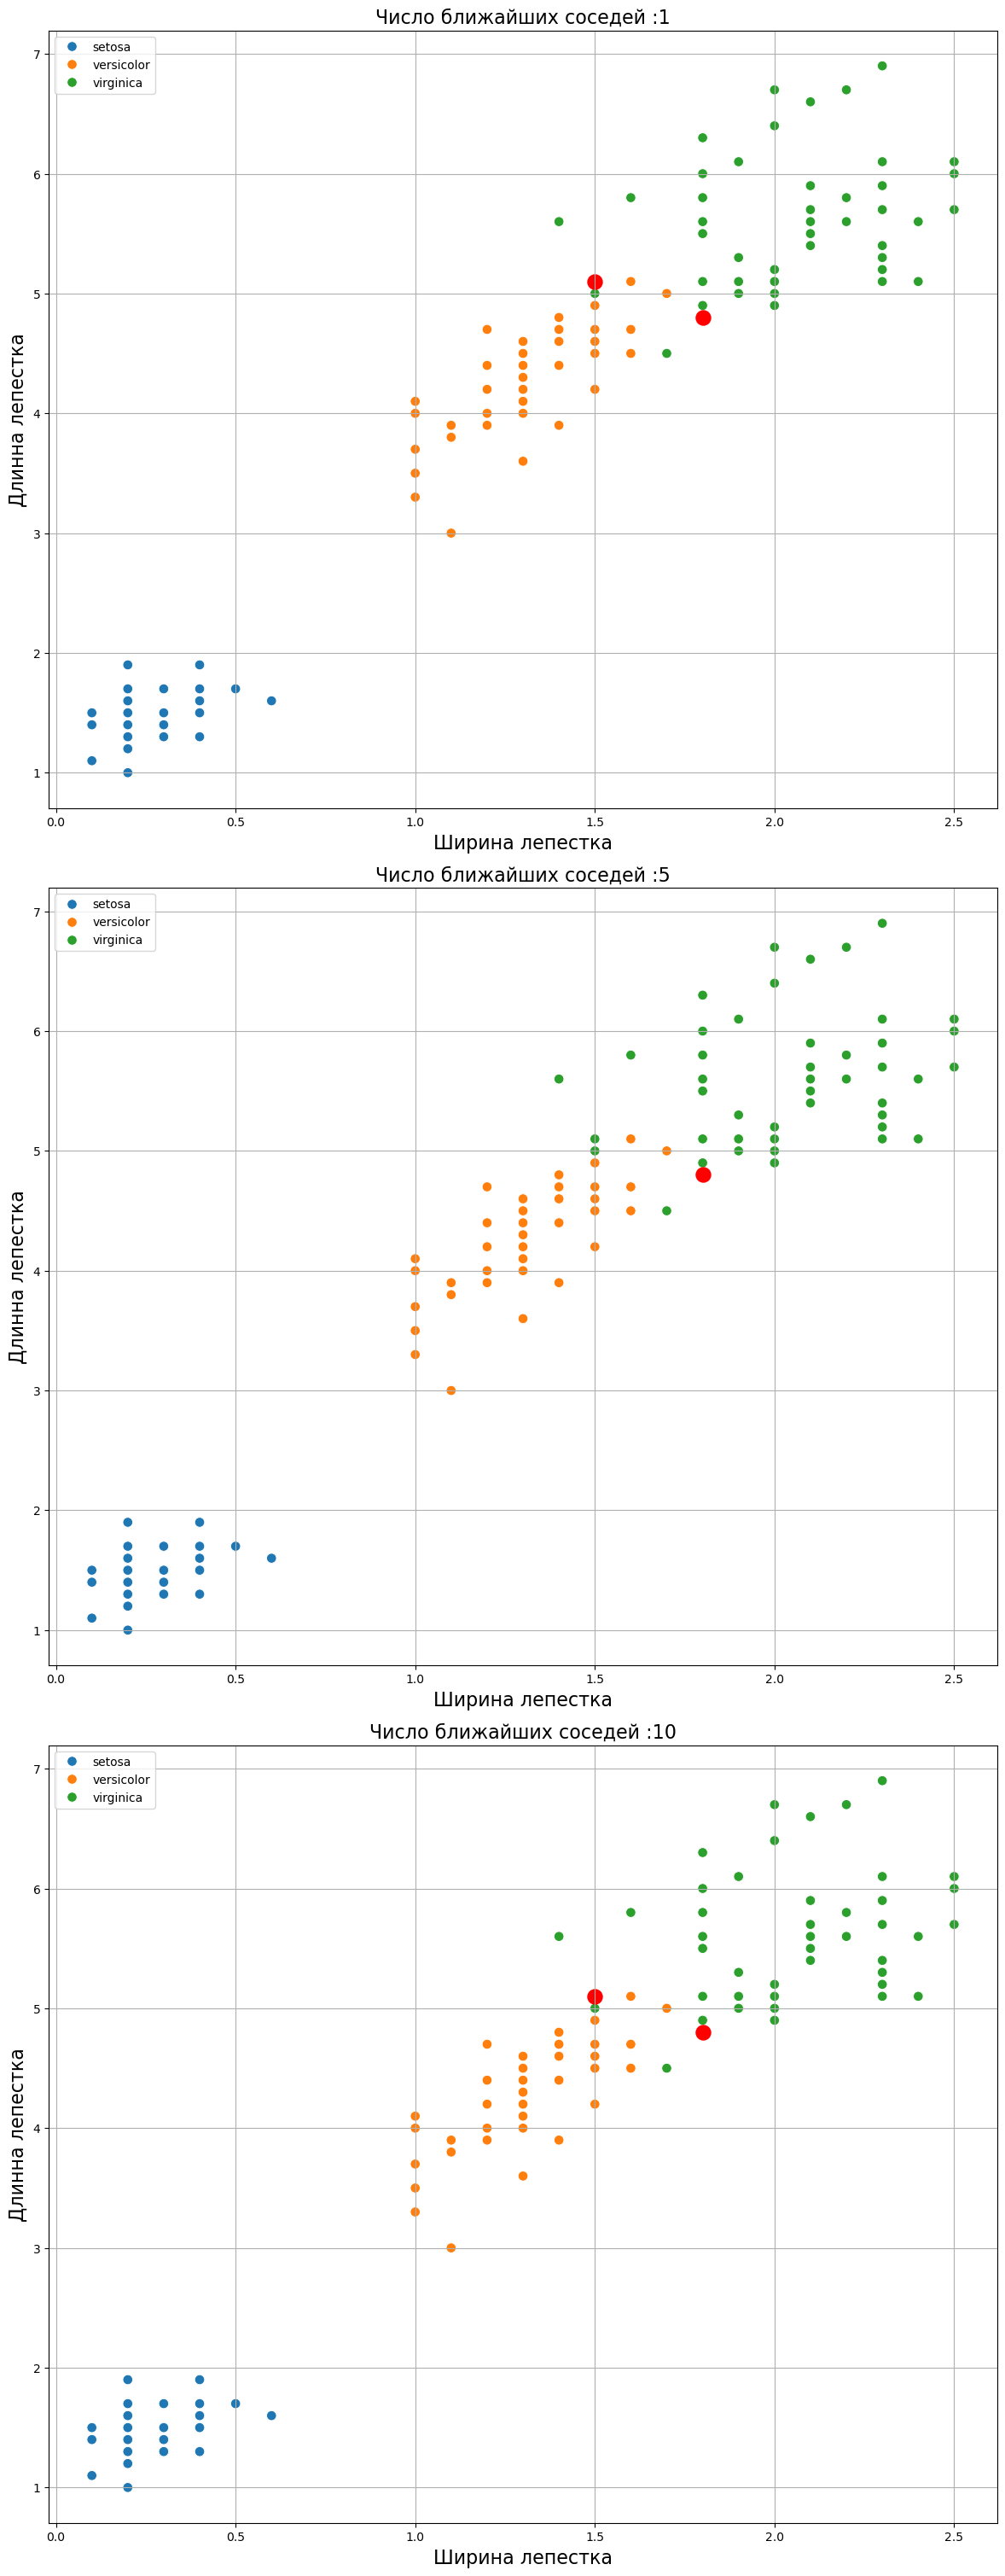

In [170]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn

iris = seaborn.load_dataset('iris')
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,:-1], 
                                                    iris.iloc[:, -1],
                                                    test_size=0.15)
model = [KNeighborsClassifier(n_neighbors=i) for i in [1,5,10]]
[i.fit(X_train, y_train) for i in model]
y_pred = [i.predict(X_test) for i in model]

plt.rcParams ['figure.figsize'] = [12, 30]

for i, y in zip(range(1,4),y_pred):
    plt.subplot(3,1,i)
    plt.tight_layout()
    seaborn.scatterplot(x = "petal_width", y = 'petal_length', data = iris, hue = 'species', s = 70)
    plt.legend(loc=2)
    plt.grid()
    plt.title("Число ближайших соседей :"+str([1,5,10][i-1]),fontsize=16)
    plt.xlabel("Ширина лепестка",fontsize=16)
    plt.ylabel("Длинна лепестка",fontsize=16)
    print(f"Для {[1,5,10][i-1]:d} ближайших соседей, точность составила: {accuracy_score(y_test,y):.3f}")
    for i in range(len(y_test)):
        if np.array(y_test)[i] != y[i]:
            plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

После нескольких прогонов, было выявлено, что наибольшая точность достигается при 5 ближайших соседях.
Поскольку результаты изменчивы с каждым прогоном, необходимо запускать подбор моделей  до тех пор, пока точность не будет близка к установленным пределам. (допустим 95%)

# 3.3.2 Задание
Определите набор признаков человека, по аналогии из РТ 1, – например, цвет глаз и конвертируйте его в матрицу признаков.

In [225]:
#Модель: должность критической инфраструктуры. 
#Ск. принятия решений: Импульс, Планирование
#Стратегия решений: Риск, Баланс, Сохранение
#Объём применения средств: Высокий, Средний, Малый
#Объём делегирования полномочий: Полный, Древовидный, Минимален

from sklearn.feature_extraction import DictVectorizer
import pandas as pd

pd.set_option('future.no_silent_downcasting', True)

ivan = {"Решения":"Импульс", "Средства":"Малый" ,"Полномочия":"Минимален"}
oleg = {"Решения":"Планирование", "Стратегия":"Сохранение", "Средства":"Высокий"}
igor = {"Решения":"Планирование", "Стратегия":"Баланс", "Средства":"Средний", "Полномочия":"Древовидный"}
yana = {"Решения":"Импульс", "Стратегия":"Риск", "Средства":"Малый", "Полномочия":"Полный"}
human_dict = [ivan,oleg,igor,yana]
human_frame = pd.DataFrame(human_dict)
features_mapper = [{"Импульс":1,"Планирование":2},{"Риск":1,"Баланс":2,"Сохранение":3},{"Высокий":1,"Средний":2,"Малый":3},{"Полный":1,"Древовидный":2,"Минимален":3}]

human_frame = human_frame.replace({"Решения":features_mapper[0],"Стратегия":features_mapper[1],"Средства":features_mapper[2],"Полномочия":features_mapper[3]})
print(human_frame)

dictvectorizer = DictVectorizer(sparse=False)
features = dictvectorizer.fit_transform(human_dict)
features

  Решения Средства Полномочия Стратегия
0       1        3          3       NaN
1       2        1        NaN         3
2       2        2          2         2
3       1        3          1         1


array([[0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.]])